In [39]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
import nltk
from sklearn import *
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
import unicodedata 
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm
from nltk.corpus import wordnet as wn
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
#import data 

df = pd.read_csv("train.tsv",sep='\t' , encoding='utf-8', nrows= 20000 )
df_test =  pd.read_csv("test.tsv",sep='\t' , encoding='utf-8' )
df.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns
df_test.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns

(20000, 2)

In [64]:
target = df.Sentiment.unique()

In [31]:
target = df.Sentiment.unique()

In [9]:
df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [41]:
# Transformer des caractères spéciaux en ASCII + maj to minuscules ( sorte de normalisation)
df['Phrase'] = (df['Phrase'].str.lower()
              .str.decode('utf-8')
              .map(lambda x: unicodedata.normalize('NFKD', x))
              .str.encode('ascii', 'ignore'))



 1) Remove punctuation marks and transform all characters to lowercase using nlk library 2) Remove stop words 3) Steaming

Sans oublier la segmentation afin de separer chaque phrase en mot l idée c que chaque mot dans une phrase va être consideré comme étant un feature
and finally tfidf

In [42]:
#stop words
stop = stopwords.words('english')
stop.extend(['will','now','today','movie','serie','series','story','film'])

# remove punctionation

def remove_punctuation(s):
    s = ''.join([i for i in s if i not in set(string.punctuation)])
    return s

df['Phrase'] = df['Phrase'].apply(remove_punctuation)
#stemming
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
#lemmatisation
lmtzr = WordNetLemmatizer()
def lem_tokens(tokens, lmtzr):
    tokked = []
    for item in tokens:
        tokked.append(lmtzr.lemmatize(item))
    return tokked

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    tokens = lem_tokens (stems,lmtzr)
    return stems

In [150]:
#df['Phrase'] = df['Phrase'].apply(tokenize)

In [151]:
#df['Phrase'] = df['Phrase'].apply(lambda x: [item for item in x if item not in stop])

In [121]:
#delete empty rows

#df['Phrase'] = df[df.Phrase.map(lambda x: len(x) if isinstance(x, list) else None) != 0]
#df = df.dropna()

In [152]:
#transform a list to one string

#df['Phrase'] = df.Phrase.map(lambda x: ' '.join(x))

In [124]:
#remove duplicates rows because after pre-processing we get same occurences

#df = df.drop_duplicates()

In [43]:
# we can improve it with changing parameters and add other parametrs 
# for example ngrams 
# max_df , min_df  and max_feature
#,ngram_range = (1,2)
vect = TfidfVectorizer(min_df=5,sublinear_tf=True, analyzer='word', stop_words=stop, tokenizer=tokenize , strip_accents = 'ascii',  max_df = 0.8)

In [44]:
#  if it takes time
transform = vect.fit_transform(df.pop('Phrase'))

In [45]:
# save it because it takes time in order to execute the same operation each time
import pickle
pickle.dump(transform, open("vectorizer.pickle", "wb"))

In [46]:
X = pickle.load(open(("vectorizer.pickle"), "rb"))

In [47]:
#sparse matrix to datframe here i used a loop because the memory of my computer does not suppert #to transfor matrix to dataframe en un seul coup that why it take time 
for i, col in enumerate(vect.get_feature_names()):
    df[col] = pd.SparseSeries(X[:, i].toarray().reshape(-1,), fill_value=0)

In [125]:
#df.to_csv('dfidf.csv', sep='\t', encoding='utf-8')

In [49]:
df.head()

,Sentiment,10,100,10thgrade,120,1790,18,1899,1915,1920,...,york,young,younger,youth,zaza,zeal,zelda,zemecki,zinger,zip
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#test if there are any NaN
print(df.isnull().values.sum().sum())


0


In [51]:
df.isnull().values.any()

False

In [19]:
#label = df.Sentiment
#train= df.drop('Sentiment', axis=1)

In [52]:
data_frame = df.values
train = data_frame[:,1:]
label = data_frame[:,0]

In [80]:
#pipline
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score


# create pipeline
#estimators = []

#estimators.append(('features', SelectKBest(chi2, k = 1)))

#estimators.append(('classif',  LinearSVC(C= 10)))

#model = Pipeline(estimators)
# evaluate pipeline
#seed = 7
#kfold = KFold(n_splits=5, random_state=seed)
#results = cross_val_score(model, train, label, cv=kfold)
#print(results.mean())


In [24]:
# model selction for SVM


#pipline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.grid_search

# create pipeline
estimators = []

#estimators.append(('features', SelectKBest(chi2)))
estimators.append(('classif', svm.SVC(decision_function_shape='ovo',kernel='rbf')))

model = Pipeline(estimators)
# evaluate pipeline
parameters = dict(classif__C=[0.1,1,10], 
                  classif__gamma= np.logspace(-1,0.1,1,10))
                  
grid = sklearn.grid_search.GridSearchCV(model, param_grid=parameters, cv = 3, verbose = 1)
grid.fit(train,label)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 31.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('classif', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classif__gamma': array([ 0.1]), 'classif__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [29]:
print('best parameters:',grid.best_params_)


('best parameters:', {'classif__gamma': 0.10000000000000001, 'classif__C': 0.1})


In [18]:
#pipline for naive bayes
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.grid_search

# create pipeline
estimators = []

estimators.append(('features', SelectKBest(chi2)))
estimators.append(('classif', MultinomialNB()))

model = Pipeline(estimators)
# evaluate pipeline
parameters = dict(features__k=[1000,2000,4000,5000], 
              classif__alpha=[0.1,1,10,100,1000])
                  
cv = sklearn.grid_search.GridSearchCV(model, param_grid=parameters)
cv.fit(train,label)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('features', SelectKBest(k=10, score_func=<function chi2 at 0x7f0a6e238668>)), ('classif', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'features__k': [1000, 2000, 4000, 5000], 'classif__alpha': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [19]:
# View the accuracy score
#print('Best score for data1:', cv.best_score_)
# View the best parameters for the model found using grid search
#print('Best C:',cv.featurC)
print('best parameters:',cv.best_params_)


('best parameters:', {'features__k': 1000, 'classif__alpha': 10})


In [75]:
#with k = 5000 the number of feature ( not sure if it correct or not)
fselect = SelectKBest(chi2, k=1000)
fit = fselect.fit_transform(train, label)
# summarize scores


In [ ]:
#grid search to find the best parameters


In [76]:

# Séparation du set de train et de test
X_train,X_test,y_train,y_test = train_test_split(fit,label, test_size = 0.3)


### svm 

In [58]:
#without feature selection and bigram
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf', gamma=0.1,C=0.1)
#clf = svm.LinearSVC()
#clf.kernel='polynomial'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [60]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [62]:
print clf.score(X_train, y_train)
score = accuracy_score(y_test, y_pred)
print score 

0.590714285714
0.554833333333


Confusion matrix, without normalization
[[   2    3  203    0    0]
 [   2    7  932    2    0]
 [   1    9 3272   70    1]
 [   0    0 1155   44    6]
 [   0    0  274   13    4]]
Normalized confusion matrix
[[  9.61538462e-03   1.44230769e-02   9.75961538e-01   0.00000000e+00
    0.00000000e+00]
 [  2.12089077e-03   7.42311771e-03   9.88335101e-01   2.12089077e-03
    0.00000000e+00]
 [  2.98240382e-04   2.68416344e-03   9.75842529e-01   2.08768267e-02
    2.98240382e-04]
 [  0.00000000e+00   0.00000000e+00   9.58506224e-01   3.65145228e-02
    4.97925311e-03]
 [  0.00000000e+00   0.00000000e+00   9.41580756e-01   4.46735395e-02
    1.37457045e-02]]


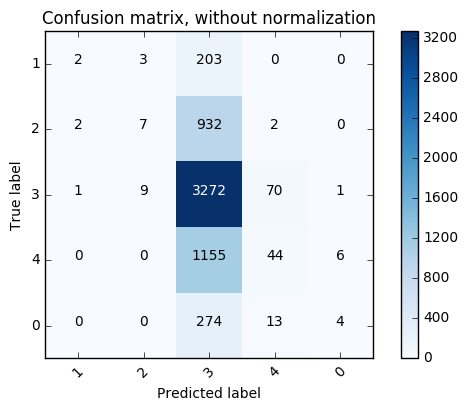

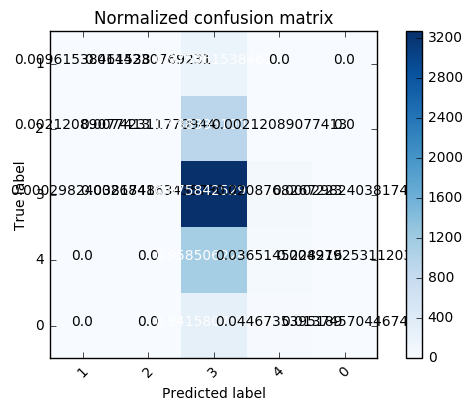

In [66]:
import itertools
class_names = target
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()




In [79]:
#with feature selection and without bigram
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf', gamma=0.1,C=0.1)
#clf = svm.LinearSVC()
#clf.kernel='polynomial'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [81]:
print np.unique(y_pred)
print clf.score(X_train, y_train)
score = accuracy_score(y_test, y_pred)
print score 

[2]
0.548785714286
0.573166666667


Confusion matrix, without normalization
[[   0    0  191    0    0]
 [   0    0  906    0    0]
 [   0    0 3439    0    0]
 [   0    0 1170    0    0]
 [   0    0  294    0    0]]
Normalized confusion matrix
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]]


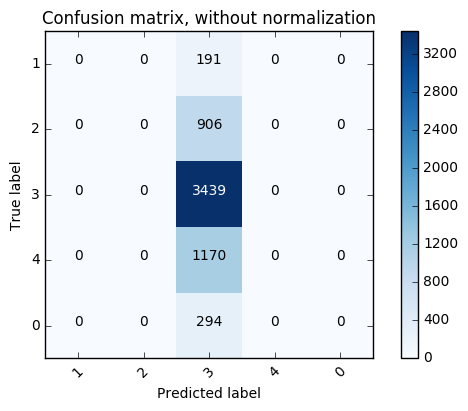

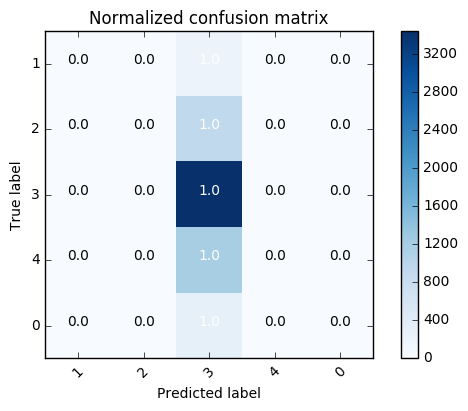

In [82]:
import itertools
class_names = target
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()




# Naive bayes


In [69]:
#without feature selection and without ngram
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=1)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
a = clf.score (X_train, y_train)
print a
score = accuracy_score(y_test, pred)
print score 

0.585142857143
0.555


[[   0    0  140    0    0]
 [   0    0  647    0    0]
 [   0    0 2227    0    0]
 [   0    0  764    0    0]
 [   0    0  222    0    0]]


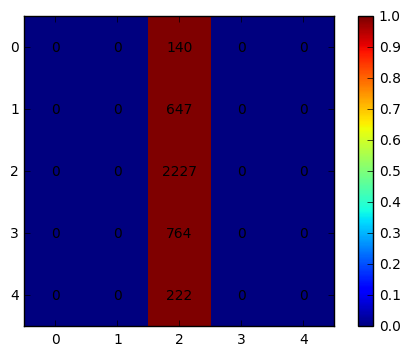

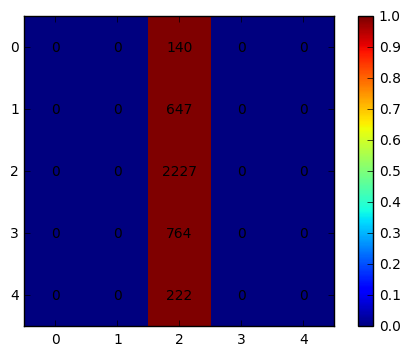

In [32]:
conf_arr= confusion_matrix(y_test, pred)
print conf
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)

plt.xticks(target)
plt.yticks(target)
plt.show()
plt.savefig('confusion_matrix.png', format='png')

In [73]:
#with feature selection and ngram

good = 0
print(len(y_test))
ln=len(y_test)
for i in y_test:
    if(y_test[i] == pred[i]):
        good= good+1
print("BernoulliNB accuracy:", good*100/len(y_test))

('BernoulliNB accuracy:', 85)


In [74]:
#without feature selection and ngram

good = 0
print(len(y_test))
ln=len(y_test)
for i in y_test:
    if(y_test[i] == pred[i]):
        good= good+1

('BernoulliNB accuracy:', 77.5566)
